In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data-in\ex2data1.txt", \
                  header=None, names=['Exam 1', 'Exam 2', 'Admitted'], encoding='utf-8')
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
#图形化
# data.dtypes
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

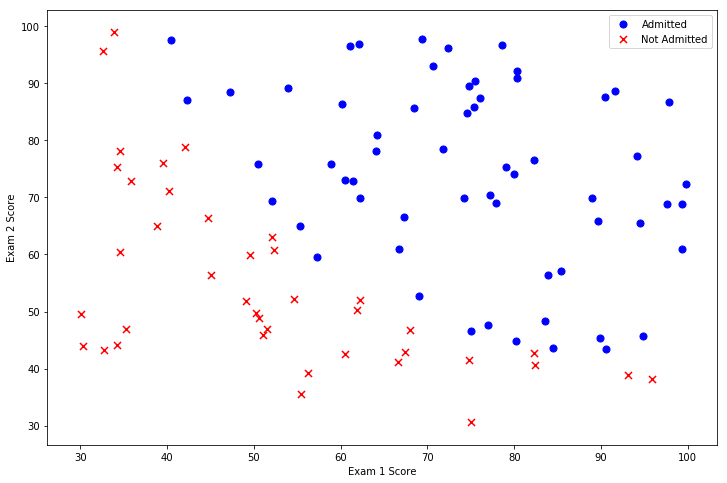

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

(0, 1)

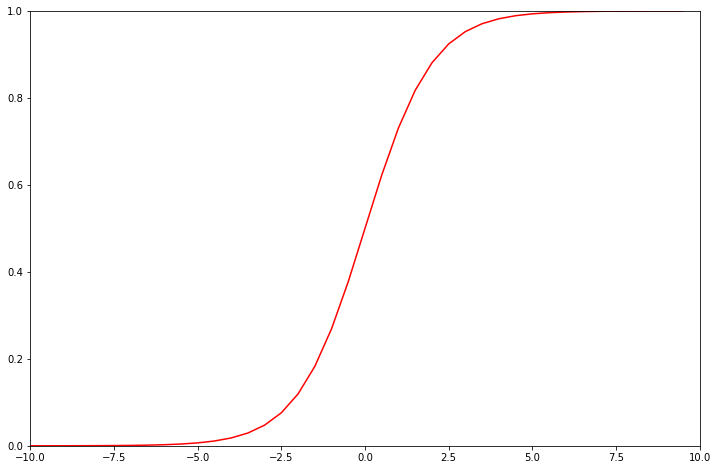

In [7]:
nums = np.arange(-10, 10, 0.5)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
ax.set_xlim(left=-10,right=10)
ax.set_ylim(bottom=0,top=1)

In [8]:
def compute_cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
#     print(X.shape, y.shape)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     print(first.shape,second.shape)
    return np.sum(first - second) / X.shape[0]

In [9]:
#数据整理
m, n = data.shape
trainData = np.ones((m, n))
trainData[:,1:] = data.values[:,:-1]
trainLabel = data.values[:,-1].reshape(m, 1)

In [10]:
theta = np.zeros(n)
compute_cost(theta, trainData, trainLabel)

0.69314718055994529

In [11]:
#梯度下降,仅仅计算梯度，不优化权重
def gradient_descent(theta, X, y):
    theta = np.matrix(theta)
#     print(compute_cost(theta, trainData, trainLabel))
    X = np.matrix(X)
    y = np.matrix(y)
    
    loss_m = sigmoid(X * theta.T) - y
#     print(loss_m.shape)
    gradient = (X.T * loss_m) / X.shape[0]
#     print(gradient)
    return gradient.T

In [12]:
#使用scipy的optimize优化权重
import scipy.optimize as opt
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient_descent, \
                     args=(trainData, trainLabel))

In [13]:
compute_cost(result[0], trainData, trainLabel)

0.20349770158947475

In [14]:
def predict(theta, X):
    theta = np.matrix(theta)
    probability_m = sigmoid(np.dot(X, theta.T))
    
    return [1 if x >= 0.5 else 0 for x in probability_m]

In [15]:
predictions = predict(result[0], trainData)
correct = [1 if ((a == 1 and b == 1 ) or (a == 0 and b == 0)) else 0 for (a,b) in \
          zip(predictions, trainLabel)]

In [16]:
type(correct)
float(sum(correct)) / 100

0.89

In [17]:
accuracy = (float(sum(correct)) / m)
print('accuracy = %d%%' % (accuracy * 100))

accuracy = 89%


## 正则化的逻辑回归

In [18]:
#regularized logistic regression
data2 = pd.read_csv('./data-in/ex2data2.txt', \
                   header=None, names=['Test1', 'Test2', 'Accepted'], encoding='utf-8')
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [19]:
positive = data2[data2.Accepted.isin([1])]
negative = data2[data2.Accepted.isin([0])]

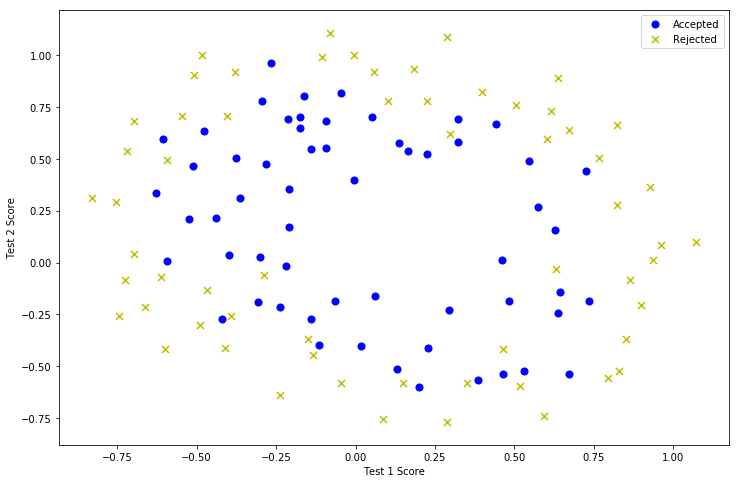

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive.Test1, positive.Test2, s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative.Test1, negative.Test2, s=50, c='y', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [21]:
#两类分隔，类似一个圆形，猜测以多次方，方程描述
degree = 6
for i in range(1, degree + 1):
    for j in range(0, i + 1):
        data2['F' + str(i) + str(j)] = np.power(data2.Test1, i-j) * np.power(data2.Test2, j)

In [22]:
data2.drop('Test1', axis=1, inplace=True)
data2.drop('Test2', axis=1, inplace=True)
data2.head()

,Accepted,F10,F11,F20,F21,F22,F30,F31,F32,F33,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [23]:
#自己写的
def compute_cost_reg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * X.shape[0])) * np.sum(np.power(theta[:,1:], 2))
    return np.sum(first - second) / X.shape[0] + reg

In [24]:
#抄的
def costReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [25]:
#又抄一个
import scipy.special as expit
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    temp = np.dot(myX,mytheta)
    print(type(temp))
    return expit(temp)

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    mytheta = mytheta.reshape(myX.shape[1], 1)
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the first part of the homework, the default 0. is used for mylambda
    """
    #note to self: *.shape is (rows, columns)
    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [26]:
#自己写的
def gradient_descent_reg(theta, X, y, learningRate):
#     print(compute_cost_reg(theta, trainData2, trainLabel2, learningRate))
#     print(X[1,:])
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    loss_m = sigmoid(X * theta.T) - y
    gradient = X.T * loss_m / X.shape[0]
#     print(gradient.shape)
    gradient[1:,:] = gradient[1:,:] + ((learningRate / X.shape[0]) * theta[:,1:]).T
#     print(gradient.T)
    return gradient.T;

In [27]:
#抄的
def gradientReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])

    return grad

In [47]:
m, n = data2.shape
print(m,n)
trainData2 = np.ones((m, n))
trainData2[:,1:] = data2.values[:,1:]
trainLabel2 = data2.values[:,0].reshape(m, 1)
# print(trainLabel2)
theta2 = np.zeros(n)

learningRate = 1
compute_cost_reg(theta2, trainData2, trainLabel2, learningRate)

118 28


0.6931471805599454

In [48]:
gradient_descent_reg(theta2, trainData2, trainLabel2, learningRate)

matrix([[  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
           5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
           1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
           2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
           1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
           1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
           5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
           3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
           4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
           3.87936363e-02]])

In [30]:
# computeCost(theta2, trainData2, trainLabel2, learningRate)

In [41]:
# result2 = opt.fmin_tnc(func=compute_cost_reg, x0=theta2, fprime=gradient_descent_reg, \
#                       args=(trainData2, trainLabel2, learningRate))

In [45]:
res = opt.minimize(fun=compute_cost_reg, x0=theta2, args=(trainData2, trainLabel2, learningRate), method='TNC', jac=gradient_descent_reg)
print(res)

     fun: 0.48293446344794438
     jac: matrix([[  1.44402524e-06,   9.45464222e-08,  -2.62820874e-07,
          -1.59946315e-07,  -1.49178602e-07,  -1.22915381e-07,
           2.47167961e-07,   4.37161930e-08,  -6.12967483e-08,
           8.07643511e-08,  -6.27404592e-08,  -1.95247769e-08,
           9.55185907e-08,   2.39149800e-08,  -5.26107908e-07,
          -8.65657302e-09,  -6.93125482e-08,  -5.21377586e-08,
          -6.03519372e-08,  -1.95017672e-08,   1.47561496e-08,
           5.05999807e-08,   6.06387612e-08,  -1.08960703e-08,
          -1.18153518e-10,   1.08818570e-07,   1.75365985e-08,
          -2.35673691e-07]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 37
     nit: 7
  status: 1
 success: True
       x: array([  1.69996418e+00,   9.73384773e-01,   1.67266990e+00,
        -2.71223370e+00,  -1.49381525e+00,  -2.11919198e+00,
         2.69961783e-01,  -5.67583455e-01,  -5.01630922e-01,
        -1.94865453e-01,  -1.97405979e+00,  -2.04387832e-02,
        -8.9405

In [32]:
result2

(array([ 1.27271026,  0.62529965,  1.18111687, -2.019874  , -0.9174319 ,
        -1.43166929,  0.12393227, -0.36553119, -0.35725405, -0.17516292,
        -1.4581701 , -0.05098417, -0.61558558, -0.27469165, -1.19271298,
        -0.24217841, -0.20603302, -0.04466178, -0.27778947, -0.29539514,
        -0.45645983, -1.04319154,  0.02779373, -0.29244865,  0.01555759,
        -0.32742404, -0.14389149, -0.92467488]), 32, 1)

In [37]:
compute_cost_reg(res.x, trainData2, trainLabel2, learningRate)

0.52900272996453523

In [46]:
predictions2 = predict(res.x, trainData2)
# print(predictions2)
# print(trainLabel2)
correct2 = [1 if ((a == 1 and b == 1) or (a ==0 and b ==0)) else 0 for (a, b) in zip(predictions2, trainLabel2)]
accuracy2 = float(sum(correct2)) / m
print('accuracy = %d%%' % (accuracy2 * 100))

accuracy = 82%
